In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Read the data
df = pd.read_excel('data(1).xlsx')

Time = df['time'].values
RX1=df['rx1'].values
RX2=df['rx2'].values

# H=[1/2,1j/2],[1j/2,1/2]
H=[np.exp(1j * np.deg2rad(45)), np.exp(1j * np.deg2rad(30)) / 2],[np.exp(1j * np.deg2rad(60)) / 2, np.exp(1j * np.deg2rad(45)) / 2]
H=np.array(H)

H_inv=np.linalg.inv(H)

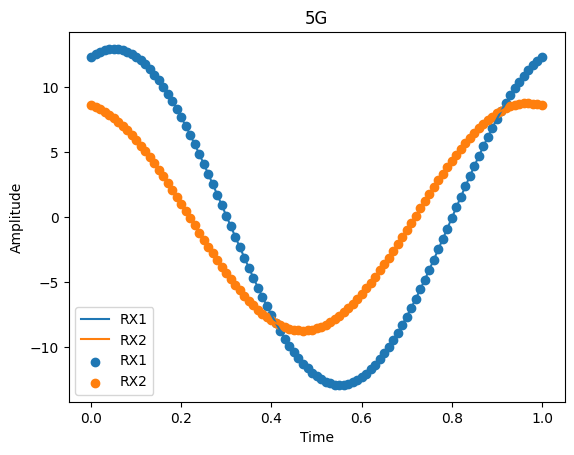

In [27]:
# Plot the data
plt.plot(Time, RX1, label='RX1')
plt.plot(Time, RX2, label='RX2')
plt.scatter(Time, RX1, label='RX1')
plt.scatter(Time, RX2, label='RX2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('5G')

plt.legend()

plt.show()

In [28]:
maxAmplitudeRX1=np.max(RX1)
maxAmplitudeRX2=np.max(RX2)

print("Max Amplitude of RX1: ", maxAmplitudeRX1)
print("Max Amplitude of RX2: ", maxAmplitudeRX2)

Max Amplitude of RX1:  12.924848880036828
Max Amplitude of RX2:  8.747458723906151


In [29]:
initialphaseRX1=np.radians(71.640772);
initialphaseRX2=np.radians(101.490318);

# if RX1[0]==0:
#     initialphaseRX1=np.pi
# elif RX1[0]==maxAmplitudeRX1:
#     initialphaseRX1=np.pi/2
# else:
#     initialphaseRX1=0

# if RX2[0]==0:
#     initialphaseRX2=np.pi
# elif RX2[0]==maxAmplitudeRX2:
#     initialphaseRX2=np.pi/2
# else:
#     initialphaseRX2=0



In [30]:
RealRX1=np.cos(2*np.pi*Time+initialphaseRX1)
ImaginaryRX1=np.sin(2*np.pi*Time+initialphaseRX1)

RealRX1=RealRX1*maxAmplitudeRX1
ImaginaryRX1=ImaginaryRX1*maxAmplitudeRX1

RealRX2=np.cos(2*np.pi*Time+initialphaseRX2)
ImaginaryRX2=np.sin(2*np.pi*Time+initialphaseRX2)

RealRX2=RealRX2*maxAmplitudeRX2
ImaginaryRX2=ImaginaryRX2*maxAmplitudeRX2

#to excel
df = pd.DataFrame({'Time': Time, 'RealRX1': RealRX1, 'ImaginaryRX1': ImaginaryRX1, 'RealRX2': RealRX2, 'ImaginaryRX2': ImaginaryRX2})
df.to_excel('5G.xlsx', sheet_name='5G', index=False)


In [31]:
RX1_Comp=RealRX1+1j*ImaginaryRX1
RX2_Comp=RealRX2+1j*ImaginaryRX2

#Complex*H_inv
TX1=RX1_Comp*H_inv[0][0]+RX2_Comp*H_inv[0][1]
TX2=RX1_Comp*H_inv[1][0]+RX2_Comp*H_inv[1][1]

TX1_Real=np.real(TX1)
TX1_Imaginary=np.imag(TX1)

TX2_Real=np.real(TX2)
TX2_Imaginary=np.imag(TX2)

#to excel
df = pd.DataFrame({'Time': Time, 'TX1_Real': TX1_Real, 'TX1_Imaginary': TX1_Imaginary, 'TX2_Real': TX2_Real, 'TX2_Imaginary': TX2_Imaginary})
df.to_excel('5G.xlsx', sheet_name='5G', index=False)


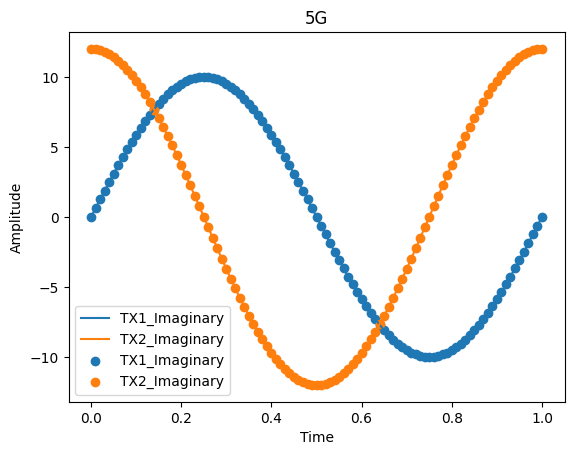

In [32]:
#plot TX1 and TX2 imaginary
plt.plot(Time, TX1_Imaginary, label='TX1_Imaginary')
plt.plot(Time, TX2_Imaginary, label='TX2_Imaginary')
# plt.plot(Time, TX1_Real, label='TX1_Real')
# plt.plot(Time, TX2_Real, label='TX2_Real')
plt.scatter(Time, TX1_Imaginary, label='TX1_Imaginary')
plt.scatter(Time, TX2_Imaginary, label='TX2_Imaginary')
# plt.scatter(Time, TX1_Real, label='TX1_Real')
# plt.scatter(Time, TX2_Real, label='TX2_Real')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('5G')

plt.legend()

plt.show()

In [33]:
print("Max Amplitude of TX1_Real: ", np.max(TX1_Real))
print("Max Amplitude of TX2_Real: ", np.max(TX2_Real))

Max Amplitude of TX1_Real:  10.000497236798909
Max Amplitude of TX2_Real:  11.99822021788788


/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


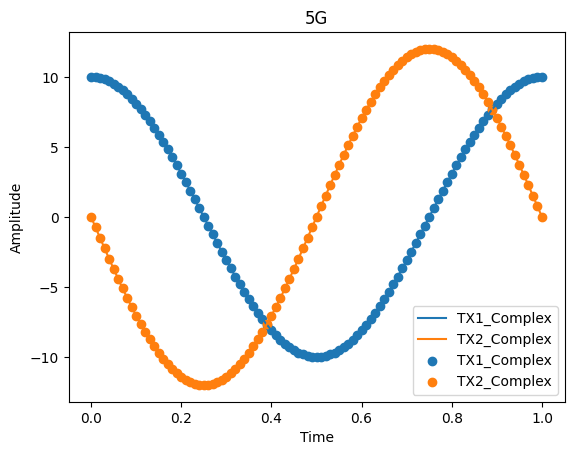

In [34]:
TX1_Complex=TX1_Real+1j*TX1_Imaginary
TX2_Complex=TX2_Real+1j*TX2_Imaginary

#plot TX1 and TX2 imaginary
plt.plot(Time, TX1_Complex, label='TX1_Complex')
plt.plot(Time, TX2_Complex, label='TX2_Complex')
plt.scatter(Time, TX1_Complex, label='TX1_Complex')
plt.scatter(Time, TX2_Complex, label='TX2_Complex')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('5G')

plt.legend()

plt.show()

#REAL SIN 
#IMAGINARY COS

In [35]:
H_inv
#TX1 Cos amplitude 10
#TX2 Sin invert amplitude 12

array([[ 1.41421356-1.41421356j, -1.        +1.73205081j],
       [-1.73205081+1.j        ,  2.82842712-2.82842712j]])